<a href="https://colab.research.google.com/github/CSheppardCodes/Scholastic-Study-of-Data-Science/blob/main/DT-RF-ADA-XGcomparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [ ]:
!pip install scikit-plot
!pip install xgboost
!pip install graphviz

In [ ]:
# Libraries imported.
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import statsmodels.api as sm
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import multiprocessing

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/CSheppardCodes/MLDatasetsUCI/main/DryBeanDataset/Dry_Bean_Dataset.csv", header=0)

In [ ]:
# First few rows of the data set.
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# Check for duplicate feature rows.
df.duplicated().sum()

68

In [ ]:
# What are the data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# Checking null values.
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
# Checking for unique values.
df.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [ ]:
# Provides important statistics.
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
feature_cols = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
X = df[feature_cols] # Features
y = df['Class'] # Target variable

In [ ]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [ ]:
y.head()

0    SEKER
1    SEKER
2    SEKER
3    SEKER
4    SEKER
Name: Class, dtype: object

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
# Distinct values for the target variable.
print(df.Class.unique())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [ ]:

label_encoder = LabelEncoder()
# Fit and transform the categorical labels
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([5, 5, 5, ..., 3, 3, 3])

In [ ]:
y_series = pd.Series(y_encoded)
y_series

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Length: 13611, dtype: int64

In [ ]:
yhot = to_categorical(y_encoded)
yhot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
column_names = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']  # Replace with your column names
yhot_df = pd.DataFrame(yhot, columns=column_names)
yhot_df

,SEKER,BARBUNYA,BOMBAY,CALI,HOROZ,SIRA,DERMASON
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
13606,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13607,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13608,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13609,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#split into test train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)#used cross validation

In [ ]:
combined_df = pd.concat([X, yhot_df], axis=1)
combined_df.head()#used for matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,SEKER,BARBUNYA,BOMBAY,CALI,HOROZ,SIRA,DERMASON
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,...,0.003564,0.909851,0.998430,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#Data visualization

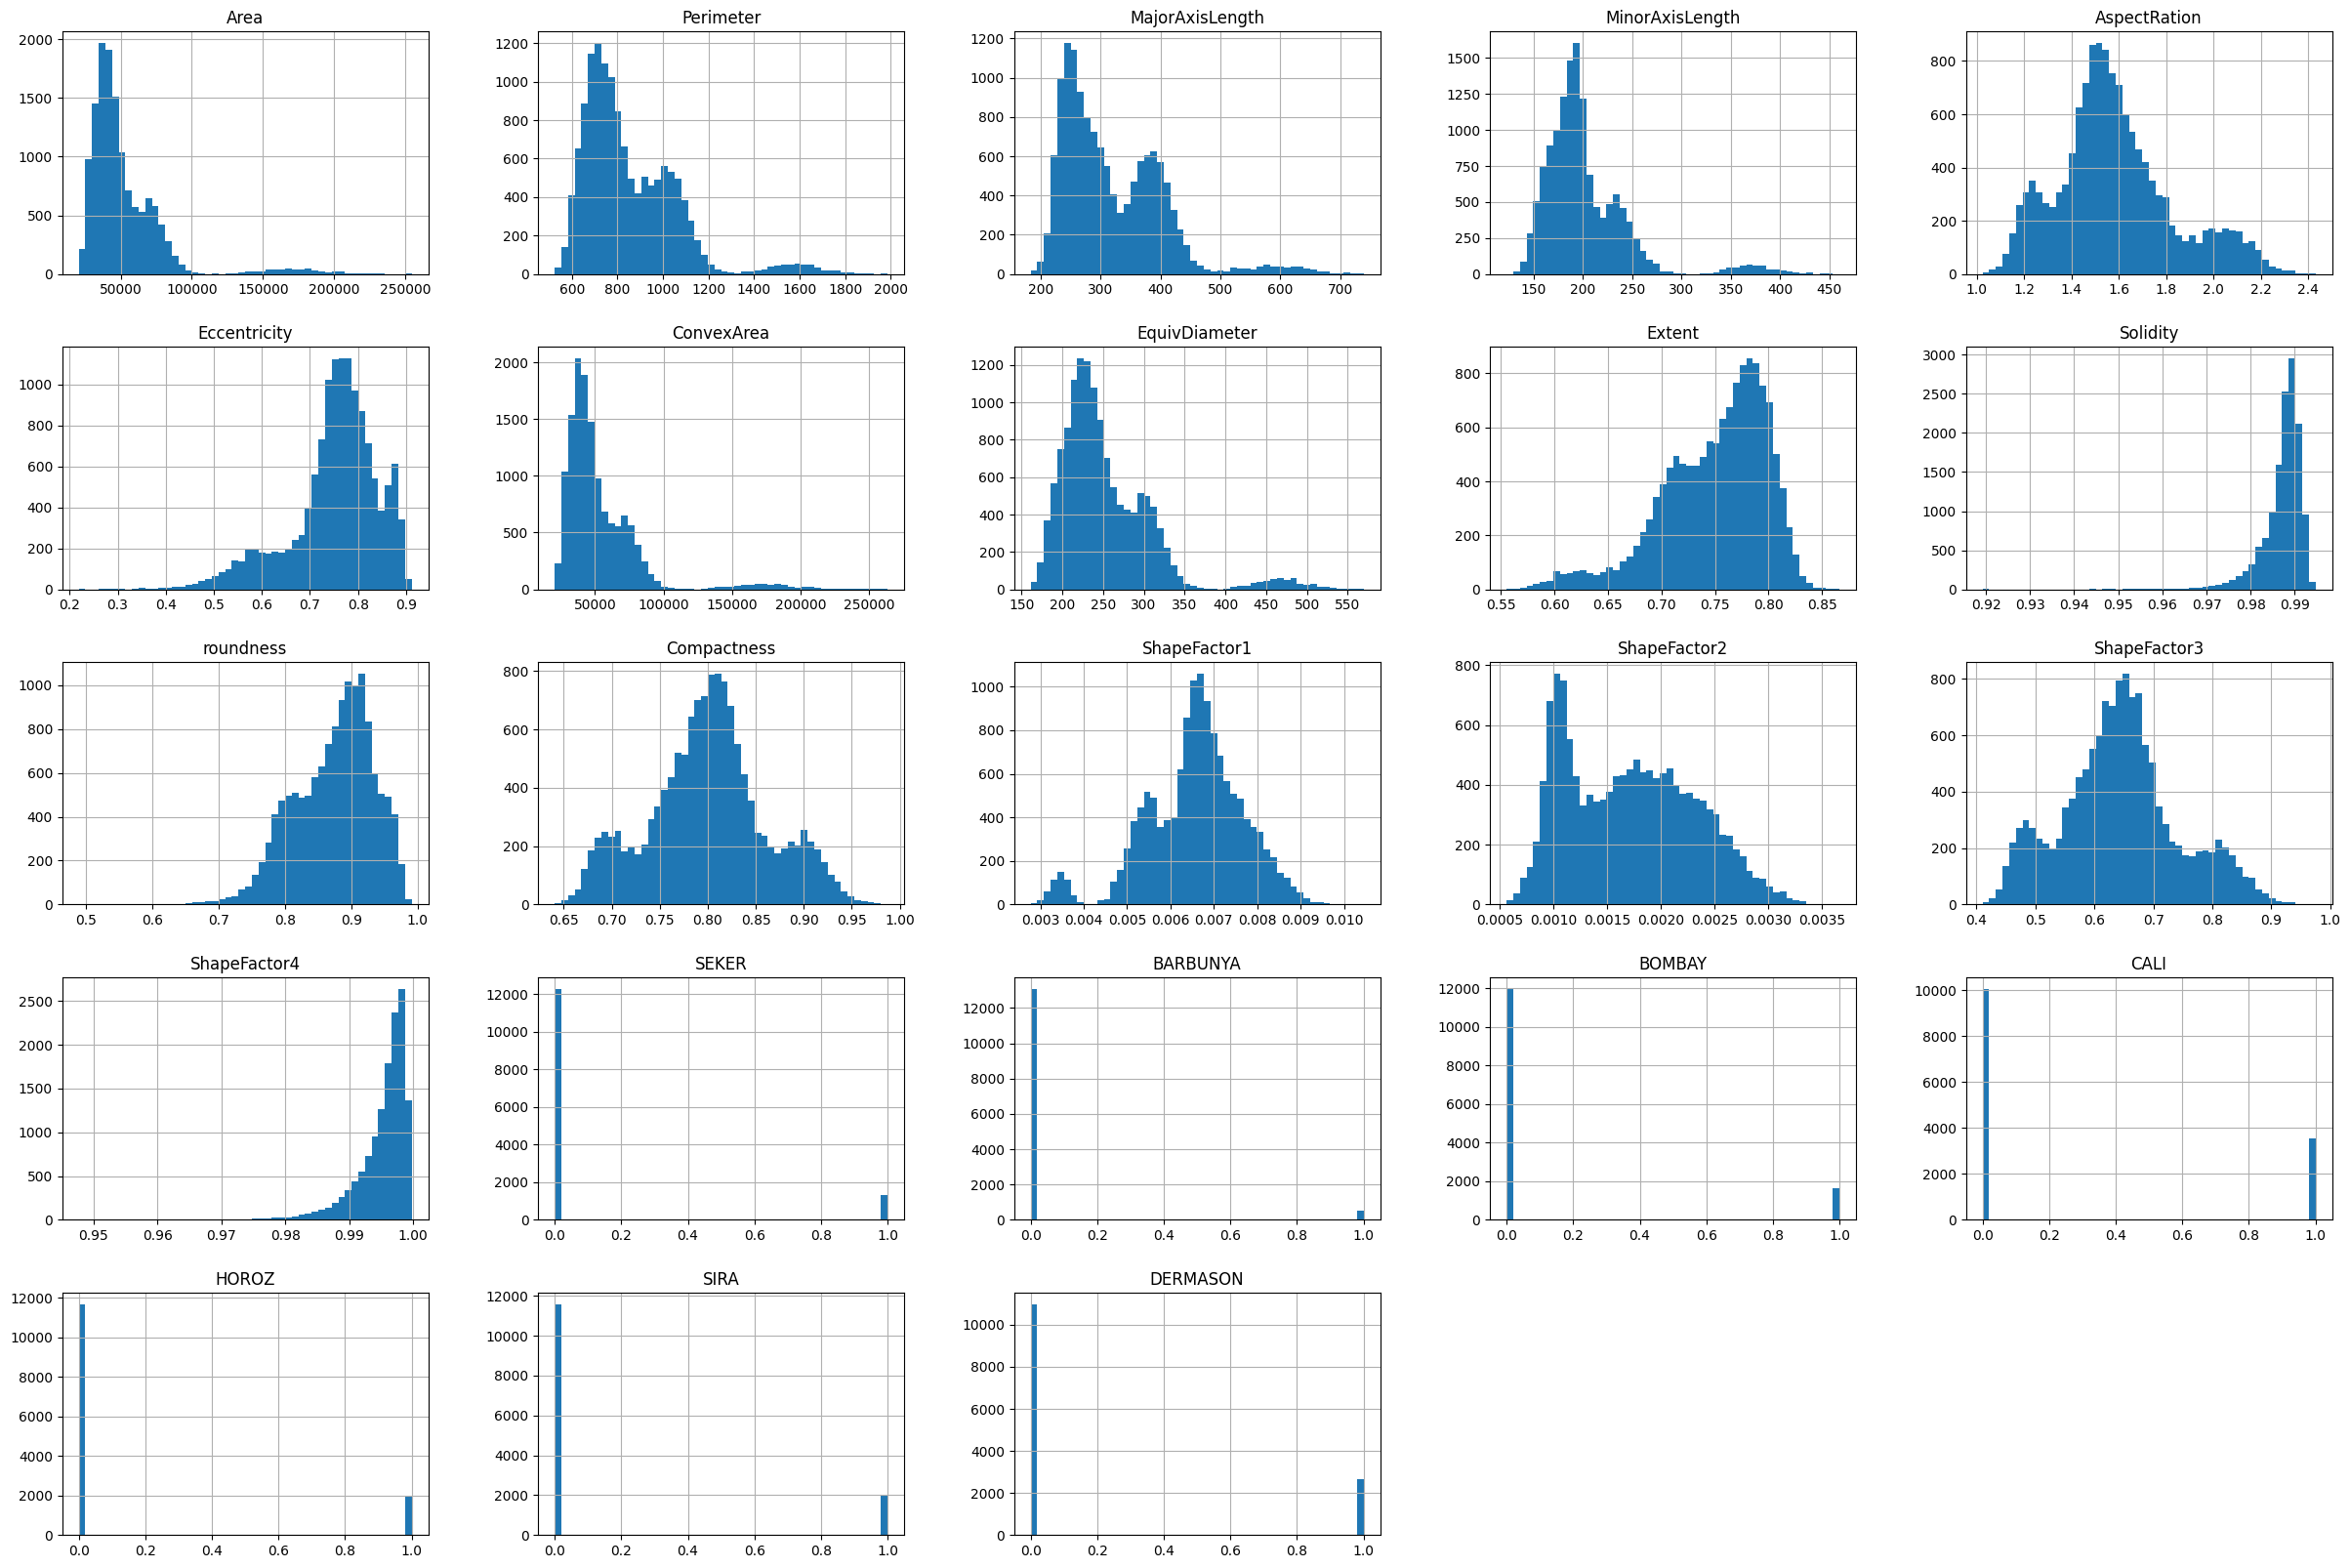

In [ ]:
%matplotlib inline
combined_df.hist(bins=50,figsize=(30,20))
plt.show()

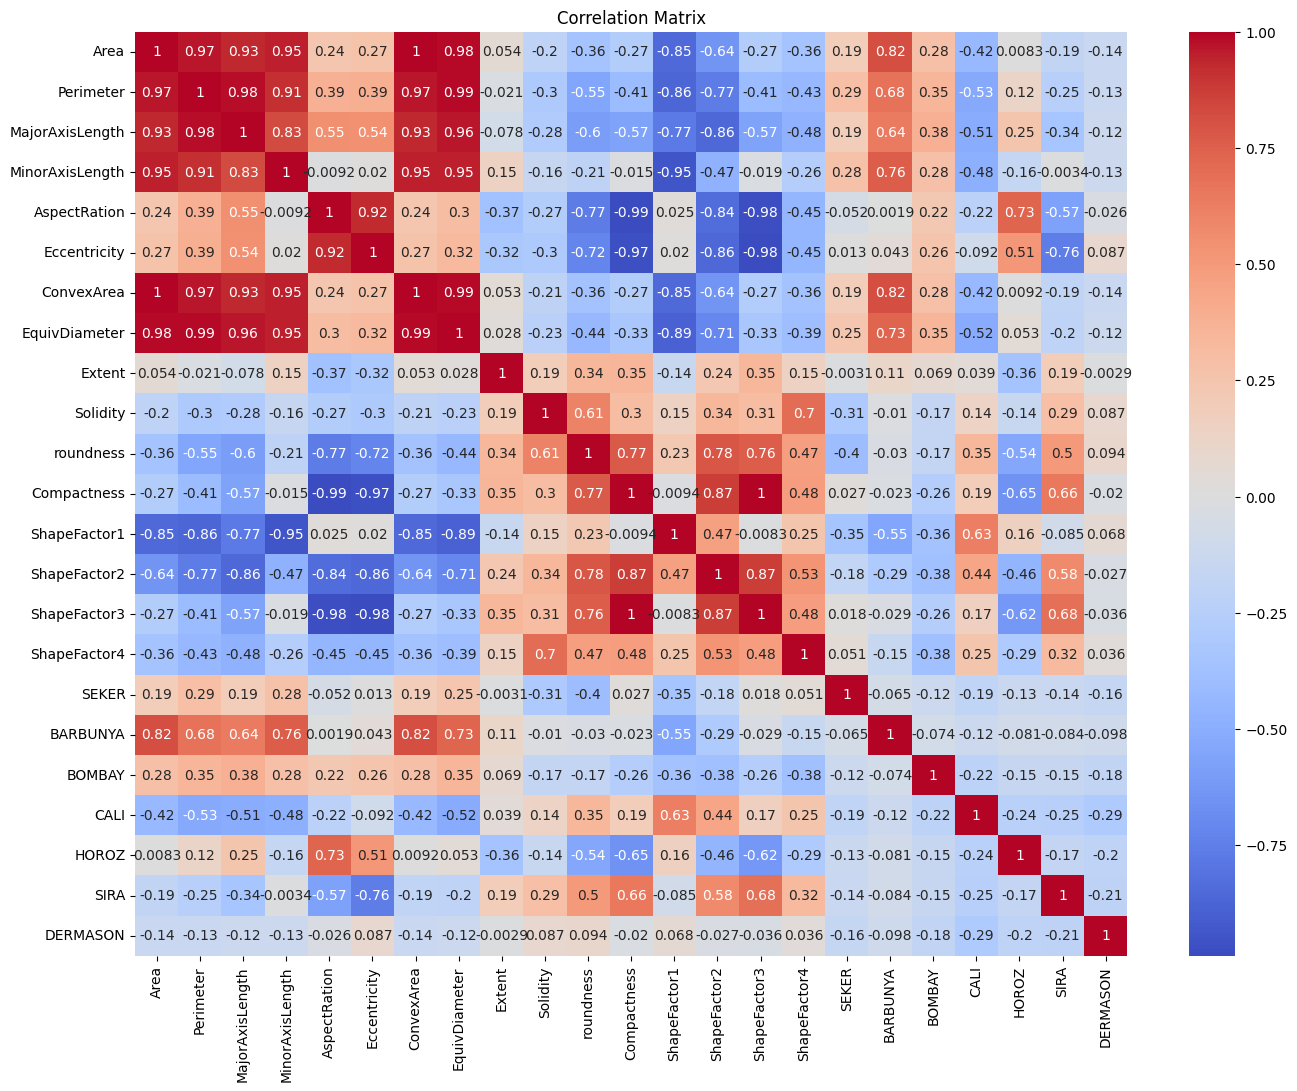

In [ ]:

# Calculate and visualize the correlation matrix
correlation_matrix = combined_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#DecisionTreeClassifier

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
# Define the model (Decision Tree Classifier) and the hyperparameter grid
DTC = DecisionTreeClassifier()
#Best DTR Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 21}

# DTC_param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'random_state': [21]
# }

#simplified to best parameters for faster runtime, above parameters where tested.
DTC_param_grid = {
    'criterion': ['entropy'],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'random_state': [21]
}

# Create the GridSearchCV object
DTC_grid_search_clf = GridSearchCV(DTC, DTC_param_grid, cv = 5, scoring ='accuracy', n_jobs = -1, return_train_score=False)

# Fit the GridSearchCV object to the training data
DTC_grid_search_clf.fit(X, y)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'min_samples_leaf': [4], 'min_samples_split': [10],
                         'random_state': [21]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and best model
best_DTC_params_clf = DTC_grid_search_clf.best_params_
best_DTC_clf = DTC_grid_search_clf.best_estimator_

# Evaluate the best model on the test set
DTC_y_pred_clf = best_DTC_clf.predict(X)
DTC_accuracy = accuracy_score(y, DTC_y_pred_clf)

print("Best DTR Parameters:", best_DTC_params_clf)
print("Test Set Accuracy:", DTC_accuracy)

Best DTR Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 21}
Test Set Accuracy: 0.9476893688928073


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
DTC_predictions = best_DTC_clf.predict(X)
DTC_predicted_probas = best_DTC_clf.predict_proba(X)
# Predictions contain predicted values (derived from probability with 0.5 threshold)
print(classification_report(y, DTC_predictions)) # DTR_predictions = DTR_clf.predict(X_test)
#print('DTR_Predicted labels: ', DTR_predictions)
print('Accuracy: ', accuracy_score(y, DTC_predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.94      0.95      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.95      0.96      0.96      1630
    DERMASON       0.93      0.95      0.94      3546
       HOROZ       0.98      0.96      0.97      1928
       SEKER       0.97      0.97      0.97      2027
        SIRA       0.92      0.90      0.91      2636

    accuracy                           0.95     13611
   macro avg       0.96      0.96      0.96     13611
weighted avg       0.95      0.95      0.95     13611

Accuracy:  0.9476893688928073


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


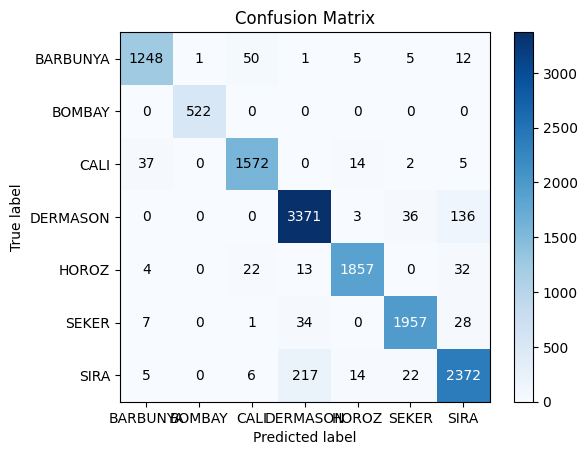

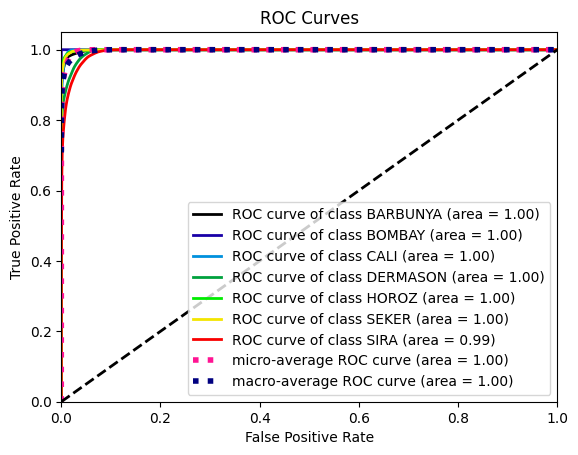

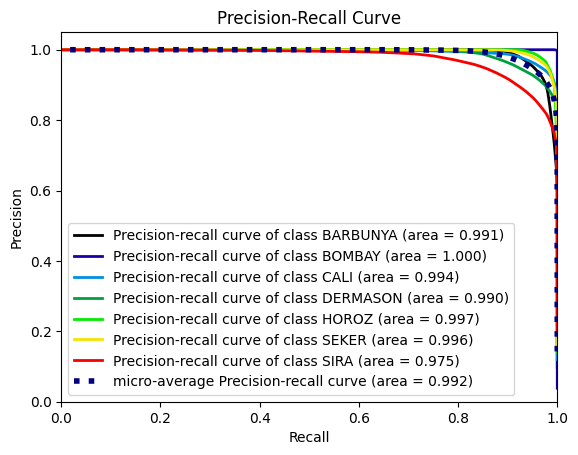

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y, DTC_predictions)
skplt.metrics.plot_roc(y, DTC_predicted_probas)
skplt.metrics.plot_precision_recall_curve(y, DTC_predicted_probas)
plt.show()

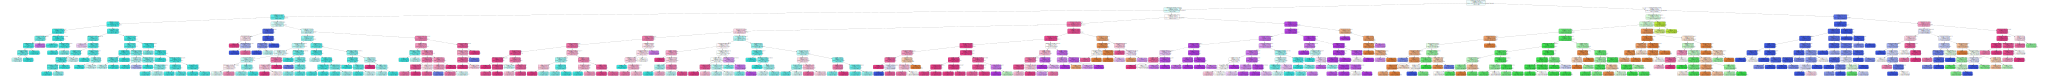

In [ ]:
import graphviz
from sklearn import tree
DTC_dot_data = tree.export_graphviz(best_DTC_clf, out_file=None,
                     feature_names=feature_cols,
                     class_names=list(set(y)),# Define class_names for the tree visualization as the unique values in the 'y' array
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(DTC_dot_data)
graph

#RandomForestClassifier

In [ ]:
# Define the model (Random Forest Classifier) & the hyperparameter grid.
# figure(figsize = (12, 12), dpi = 80)
rf = RandomForestClassifier()

# params = {
#     'max_depth': [5, 7, 9],
#     'n_estimators': [50, 100, 200],
#     'max_features': ['sqrt', 'log2']
# }
params = {
    'max_depth': [9],
    'n_estimators': [50],
    'max_features': ['log2'],
    'random_state': [21]
}

# Create the GridSearchCV object.
# grid_search_rf = GridSearchCV(rf, params, cv = 10, scoring = 'accuracy', return_train_score = False)
grid_search_rf = GridSearchCV(rf, params, cv = 5, scoring = 'accuracy', return_train_score = False)


# Fit the GridSearchCV_object to the training data.
grid_search_rf.fit(X, y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9], 'max_features': ['log2'],
                         'n_estimators': [50], 'random_state': [21]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and best model
best_rf_params_clf = grid_search_rf.best_params_
best_rf_clf = grid_search_rf.best_estimator_

# Evaluate the best model on the test set
rf_y_pred_clf = best_rf_clf.predict(X)
rf_accuracy = accuracy_score(y, rf_y_pred_clf)

print("Best DTR Parameters:", best_rf_params_clf)
print("Test Set Accuracy:", rf_accuracy)

Best DTR Parameters: {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 50, 'random_state': 21}
Test Set Accuracy: 0.9486444787304387


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
rf_predictions = best_rf_clf.predict(X)
rf_predicted_probas = best_rf_clf.predict_proba(X)
# Predictions contain predicted values (derived from probability with 0.5 threshold)
print(classification_report(y, rf_predictions)) # DTR_predictions = DTR_clf.predict(X_test)
#print('DTR_Predicted labels: ', DTR_predictions)
print('Accuracy: ', accuracy_score(y, rf_predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.92      0.94      1322
      BOMBAY       1.00      1.00      1.00       522
        CALI       0.94      0.96      0.95      1630
    DERMASON       0.94      0.96      0.95      3546
       HOROZ       0.98      0.96      0.97      1928
       SEKER       0.98      0.96      0.97      2027
        SIRA       0.90      0.91      0.91      2636

    accuracy                           0.95     13611
   macro avg       0.96      0.95      0.96     13611
weighted avg       0.95      0.95      0.95     13611

Accuracy:  0.9486444787304387


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


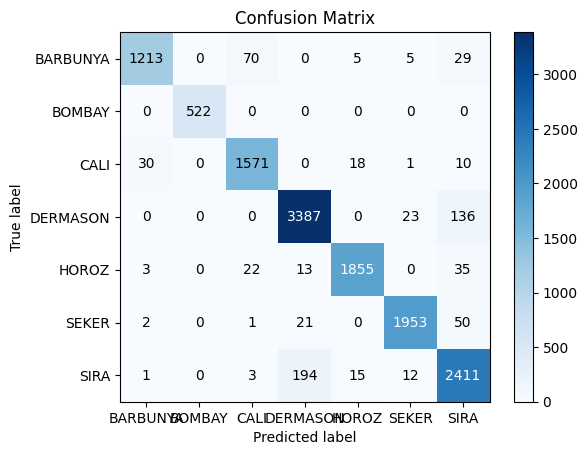

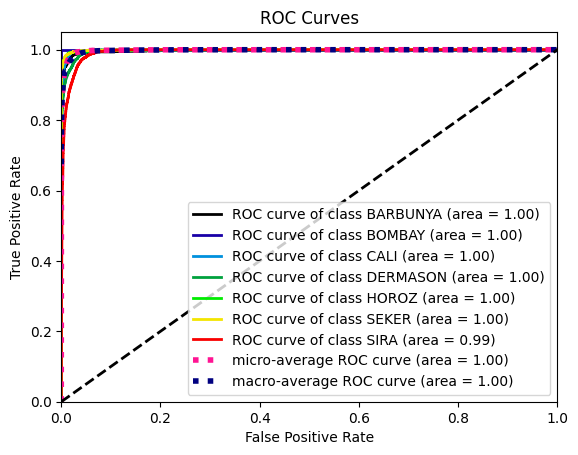

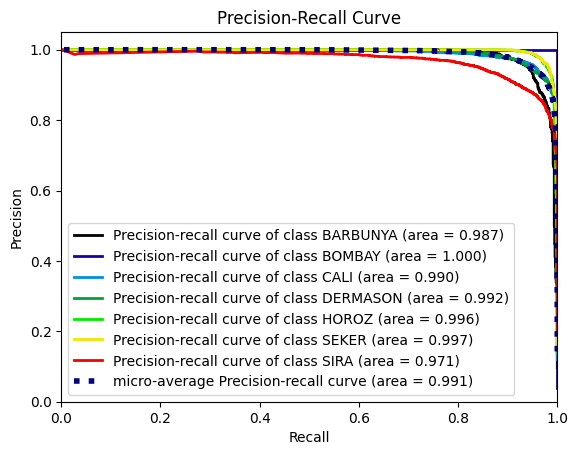

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y, rf_predictions)
skplt.metrics.plot_roc(y, rf_predicted_probas)
skplt.metrics.plot_precision_recall_curve(y, rf_predicted_probas)
plt.show()

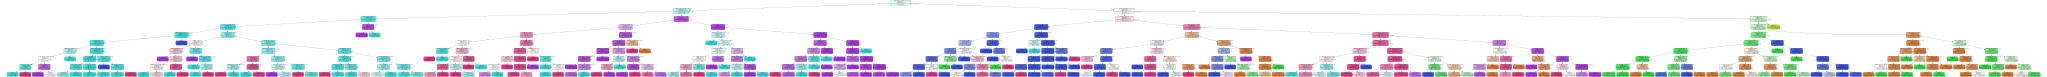

In [ ]:
import graphviz
from sklearn import tree

# Choose one decision trees from the Random Forest
tree_in_forest = best_rf_clf.estimators_[0]  # 0 which of the trees

rf_dot_data = tree.export_graphviz(tree_in_forest, out_file=None,
                                feature_names=feature_cols,
                                class_names=list(set(y)),  # Define class_names for the tree visualization
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(rf_dot_data)
graph

#AdaBoost

In [ ]:
# Implementing the AdaBoost Classifier.
from sklearn.ensemble import AdaBoostClassifier

ADA = AdaBoostClassifier()

params = {
    'algorithm': ['SAMME'],
    'learning_rate': [0.5],
    'n_estimators': [200,300],
    'random_state': [42, 36]
}
# params = {
#     'algorithm': ['SAMME', 'SAMME.R'],
#     'learning_rate': [0.01, 0.1, 1.0],
#     'n_estimators': [50, 100, 200],
#     'random_state': [21]
# }
#Best Parameters:  {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 42}

# Create the GridSearchCV object.
# grid_search_ADA = GridSearchCV(ADA, params, cv = 10, scoring = 'accuracy', return_train_score = False)
grid_search_ADA = GridSearchCV(ADA, params, cv = 5, scoring = 'accuracy', return_train_score = False)

# Fit the GridSearchCV_object to the training data.
grid_search_ADA.fit(X, y)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME'], 'learning_rate': [0.5],
                         'n_estimators': [200, 300], 'random_state': [42, 36]},
             scoring='accuracy')

In [ ]:
ADA.fit(X, y)#default model

AdaBoostClassifier()

In [ ]:
print("Training", ADA.score(X, y))
# print("Best Parameters: ", best_params_ADA)
print("Test Set Accuracy: ", accuracy_score(y_test, ADA.predict(X_test)))#default model

Training 0.6375725516126662
Test Set Accuracy:  0.6360631656261476


In [ ]:
# Get the best parameters and best model
best_ADA_params_clf = grid_search_ADA.best_params_
best_ADA_clf = grid_search_ADA.best_estimator_

# Evaluate the best model on the test set
ADA_y_pred_clf = best_ADA_clf.predict(X)
ADA_accuracy = accuracy_score(y, ADA_y_pred_clf)

print("Best DTR Parameters:", best_ADA_params_clf)
print("Test Set Accuracy:", ADA_accuracy)

Best DTR Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 300, 'random_state': 42}
Test Set Accuracy: 0.8794357504959224


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
ADA_predictions = best_ADA_clf.predict(X)
ADA_predicted_probas = best_ADA_clf.predict_proba(X)
# Predictions contain predicted values (derived from probability with 0.5 threshold)
print(classification_report(y, ADA_predictions)) # DTR_predictions = DTR_clf.predict(X_test)
#print('DTR_Predicted labels: ', DTR_predictions)
print('Accuracy: ', accuracy_score(y, ADA_predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.82      0.88      1322
      BOMBAY       1.00      0.42      0.59       522
        CALI       0.74      0.95      0.84      1630
    DERMASON       0.87      0.93      0.90      3546
       HOROZ       0.93      0.95      0.94      1928
       SEKER       0.90      0.94      0.92      2027
        SIRA       0.91      0.79      0.84      2636

    accuracy                           0.88     13611
   macro avg       0.90      0.83      0.84     13611
weighted avg       0.89      0.88      0.88     13611

Accuracy:  0.8794357504959224


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


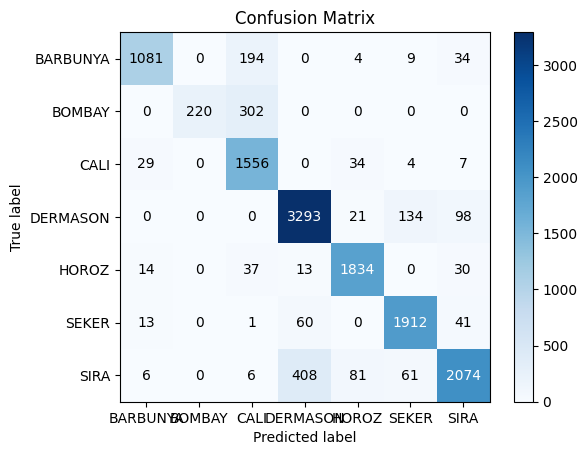

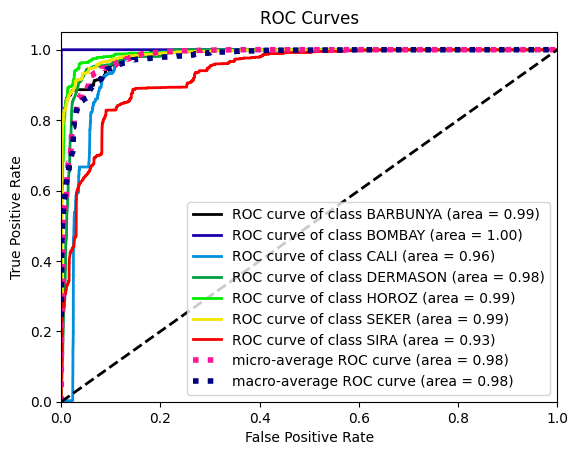

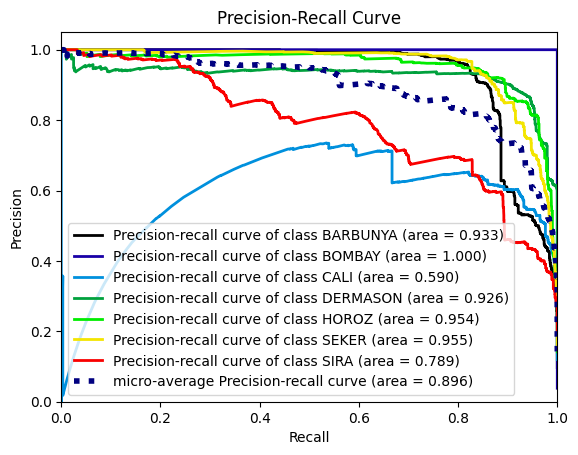

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y, ADA_predictions)
skplt.metrics.plot_roc(y, ADA_predicted_probas)
skplt.metrics.plot_precision_recall_curve(y, ADA_predicted_probas)
plt.show()

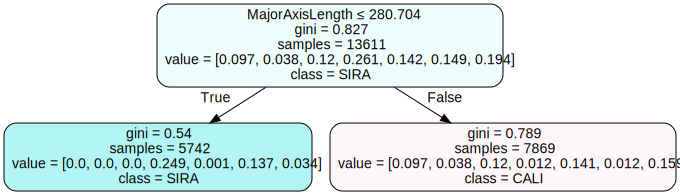

In [ ]:
import graphviz
from sklearn import tree

# Choose one decision trees from the Random Forest
tree_in_ADA_forest = best_ADA_clf.estimators_[0]  # 0 which of the trees

ADA_dot_data = tree.export_graphviz(tree_in_ADA_forest, out_file=None,
                                feature_names=feature_cols,
                                class_names=list(set(y)),  # Define class_names for the tree visualization
                                filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(ADA_dot_data)
graph

#XGBOOST Classifier

In [ ]:
y_series

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Length: 13611, dtype: int64

In [ ]:
type(y_series)

pandas.core.series.Series

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train

2663     BARBUNYA
7648         SIRA
7480         SIRA
3339     BARBUNYA
4179         CALI
           ...   
905         SEKER
5192         CALI
12172    DERMASON
235         SEKER
13349    DERMASON
Name: Class, Length: 10888, dtype: object

In [ ]:
#correct

xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)

XGB_param_grid = {
    'max_depth': [2],
    'n_estimators': [50]
}
# xgb_param_grid = {
#     'max_depth': [2, 3, 4, 6],
#     'n_estimators': [50, 100, 200]
# }

xgbtest = GridSearchCV(xgb_model,XGB_param_grid, verbose=1, n_jobs=2)
xgbtest.fit(X, y_series)
print(xgbtest.best_score_)
print(xgbtest.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.6974647619011642
{'max_depth': 2, 'n_estimators': 50}


In [ ]:
# Get the best parameters and best model
best_XGB_params_clf = xgbtest.best_params_
best_XGB_clf = xgbtest.best_estimator_

# Evaluate the best model on the test set
XGB_y_pred_clf = best_XGB_clf.predict(X)
XGB_accuracy = accuracy_score(y_series, XGB_y_pred_clf)

print("Best DTR Parameters:", best_XGB_params_clf)
print("Test Set Accuracy:", XGB_accuracy)

Best DTR Parameters: {'max_depth': 2, 'n_estimators': 50}
Test Set Accuracy: 0.9371831606788626


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
XGB_predictions = best_XGB_clf.predict(X)
XGB_predicted_probas = best_XGB_clf.predict_proba(X)
# Predictions contain predicted values (derived from probability with 0.5 threshold)
print(classification_report(y_series, XGB_predictions)) # DTR_predictions = DTR_clf.predict(X_test)
#print('DTR_Predicted labels: ', DTR_predictions)
print('Accuracy: ', accuracy_score(y_series, XGB_predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1322
           1       1.00      1.00      1.00       522
           2       0.95      0.96      0.96      1630
           3       0.92      0.94      0.93      3546
           4       0.96      0.96      0.96      1928
           5       0.96      0.96      0.96      2027
           6       0.89      0.88      0.88      2636

    accuracy                           0.94     13611
   macro avg       0.95      0.95      0.95     13611
weighted avg       0.94      0.94      0.94     13611

Accuracy:  0.9371831606788626


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


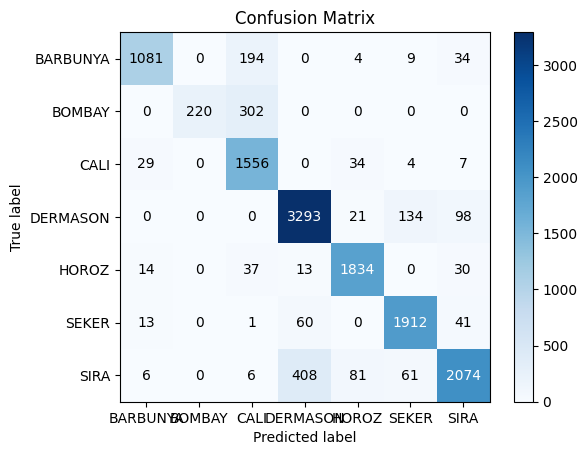

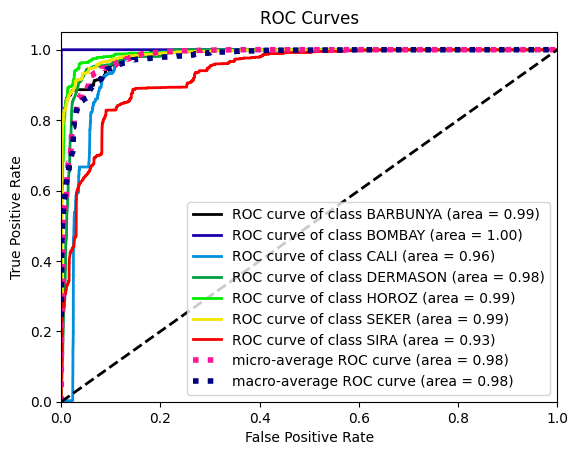

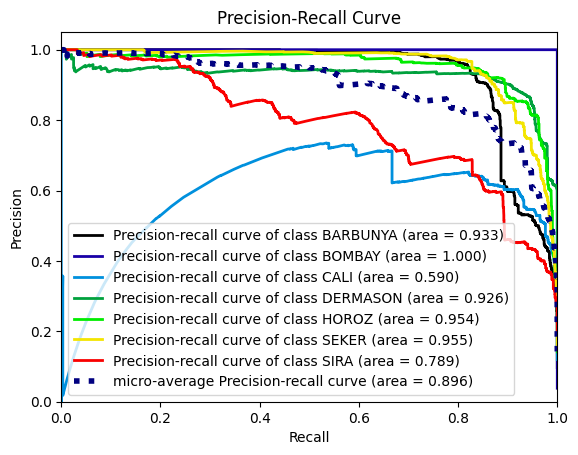

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_confusion_matrix(y, ADA_predictions)
skplt.metrics.plot_roc(y, ADA_predicted_probas)
skplt.metrics.plot_precision_recall_curve(y, ADA_predicted_probas)
plt.show()

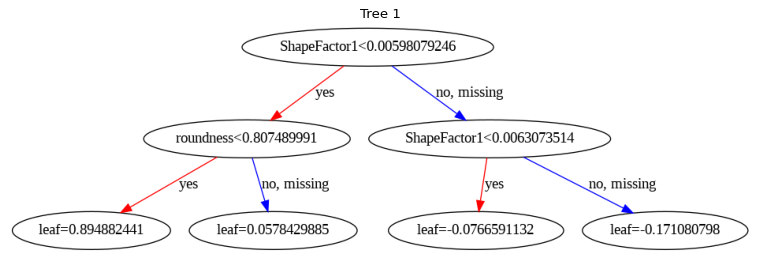

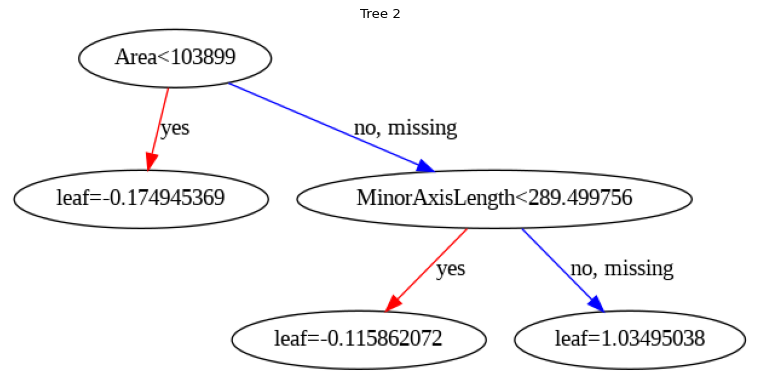

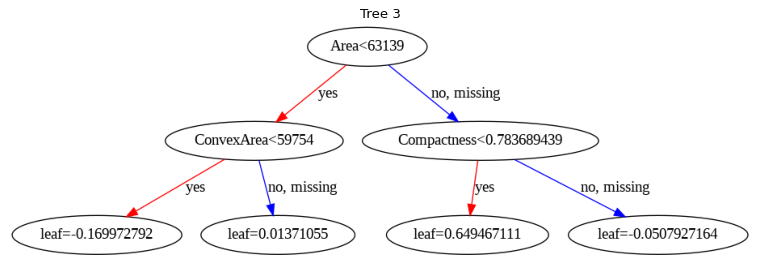

In [ ]:
# Get the best estimator from GridSearchCV
# best_xgb_model = best_XGB_params_clf.best_estimator_

num_trees_to_plot = 3 #there are 50 for i in range(best_xgb_model.n_estimators):
for i in range(num_trees_to_plot):
    fig, ax = plt.subplots(figsize=(12, 12), dpi=80)
    xgb.plot_tree(best_XGB_clf, num_trees=i, ax=ax)
    plt.title(f'Tree {i+1}')
    plt.show()